In [6]:
import os

In [7]:
from PIL import Image

In [8]:
import numpy as np
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
data_raw_dir = "/Users/Paul-Emmanuel/Desktop/PhD/3_DST_incidence/data_raw"

In [11]:
seller_colors = {
    'amazon': [99, 168, 94, 255],
    'new': [0, 51, 204, 255]
}

In [21]:
file_name = os.path.join(data_raw_dir, 'charts_amazon_France', 'B0000C73CQ.png')

In [24]:
seller = 'amazon'

In [25]:
img = Image.open(file_name)
img_array = np.array(img)

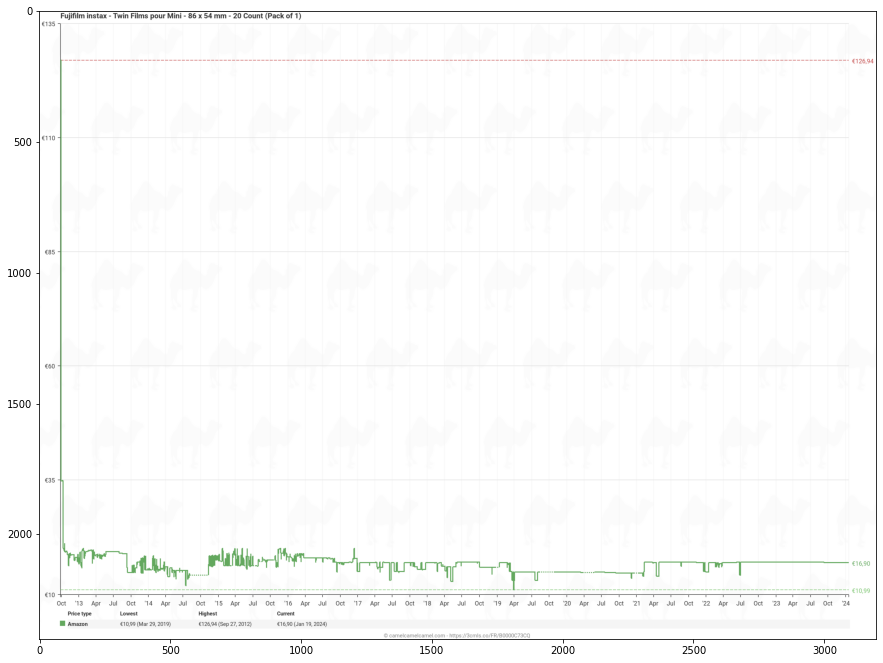

In [26]:
plt.figure(figsize=(15, 15))
plt.imshow(img_array);

In [1]:
data_raw_dir = "/Users/Paul-Emmanuel/Desktop/PhD/3_DST_incidence/data_raw"

from dst_incidence.amazon_prices import PriceHistoryCollector

collector = PriceHistoryCollector(
    data_raw_dir=data_raw_dir,
    sku_reference='B0000C73CQ',
    country="France",
)

In [2]:
collector.fetch_product_information()

collector.build_price_history_from_charts()
collector.get_start_end_dates_from_charts()
collector.get_end_date_from_price_history_summary()
collector.convert_coordinates_to_timestamps()

collector.format_price_histories()
collector.format_price_history_summary()
collector.format_product_data()
collector.build_collection_metadata()

/Users/Paul-Emmanuel/.pyenv/versions/3.7.7/envs/lewagon-data/lib/python3.7/site-packages/dst_incidence/amazon_prices.py:207: RuntimeWarning: Mean of empty slice.
  avg_y_coord = img_array.shape[0] - y_coords.mean()
/Users/Paul-Emmanuel/.pyenv/versions/3.7.7/envs/lewagon-data/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation minimum which has no identity

In [16]:
collector.price_histories['new']

,avg_y_coords,trusted,price,date,sku,country,unit,seller
0,1310.5,True,7.830482,2017-03-01 00:00:00.000,B00X7792IE,France,€,new
1,1310.5,True,7.830482,2017-03-01 23:24:33.750,B00X7792IE,France,€,new
2,1310.5,True,7.830482,2017-03-02 22:49:07.500,B00X7792IE,France,€,new
3,1310.5,True,7.830482,2017-03-03 22:13:41.250,B00X7792IE,France,€,new
4,1305.5,True,7.796084,2017-03-04 21:38:15.000,B00X7792IE,France,€,new
...,...,...,...,...,...,...,...,...
2555,1044.5,False,6.000530,2025-03-29 13:21:33.750,B00X7792IE,France,€,new
2556,1044.5,False,6.000530,2025-04-03 10:24:22.500,B00X7792IE,France,€,new
2557,1044.5,False,6.000530,2025-04-04 09:48:56.250,B00X7792IE,France,€,new
2558,1044.5,False,6.000530,2025-04-05 09:13:30.000,B00X7792IE,France,€,new


In [25]:
new_price_history = collector.price_histories['new'].copy()

In [26]:
new_price_history['transition'] = np.logical_and(
    new_price_history['trusted'] != new_price_history['trusted'].shift(1),
    ~new_price_history['trusted'].shift(1).isnull()
)

new_price_history['transition#'] = new_price_history['transition'].cumsum()

In [31]:
trusted_dfs = []
not_trusted_dfs = []

for i in range(new_price_history['transition#'].max() + 1):
    extract = new_price_history[new_price_history['transition#'] == i].copy()
    
    if extract['trusted'].unique()[0]:
        trusted_dfs.append(extract)
        
    else:
        not_trusted_dfs.append(extract)

In [35]:
np.array(collector.seller_colors['new'][1:]) / 255

[51, 204, 255]

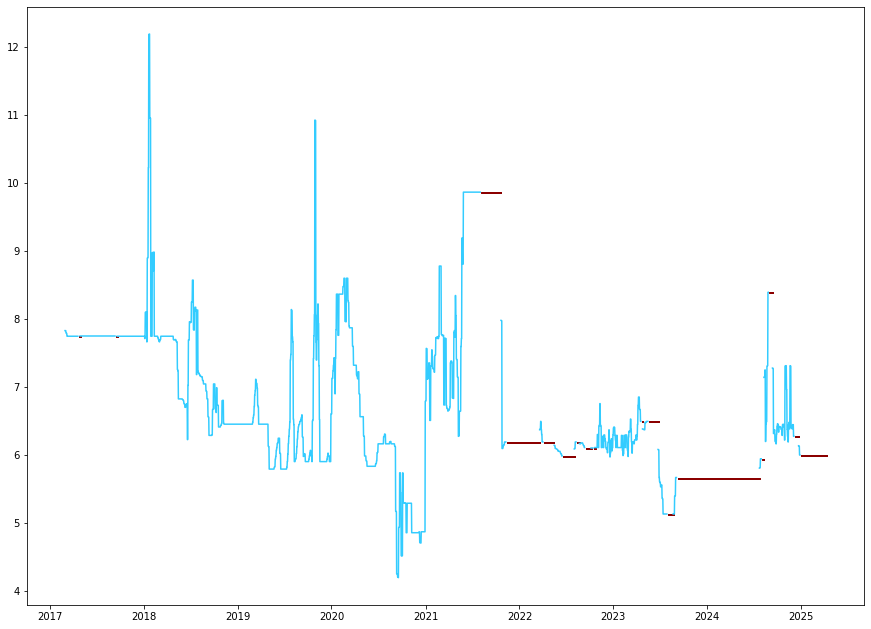

In [44]:
plt.figure(figsize=(15, 11))

for trusted_df in trusted_dfs:
    plt.plot(
        trusted_df['date'], 
        trusted_df['price'], 
        color=np.array(collector.seller_colors['new'][1:]) / 255
    )
    
for not_trusted_df in not_trusted_dfs:
    plt.scatter(
        not_trusted_df['date'], 
        not_trusted_df['price'], 
        marker='s', 
        s=1,
        color='darkred'
    )
    
plt.show()

In [43]:
import time
time.time()

1705945438.528291

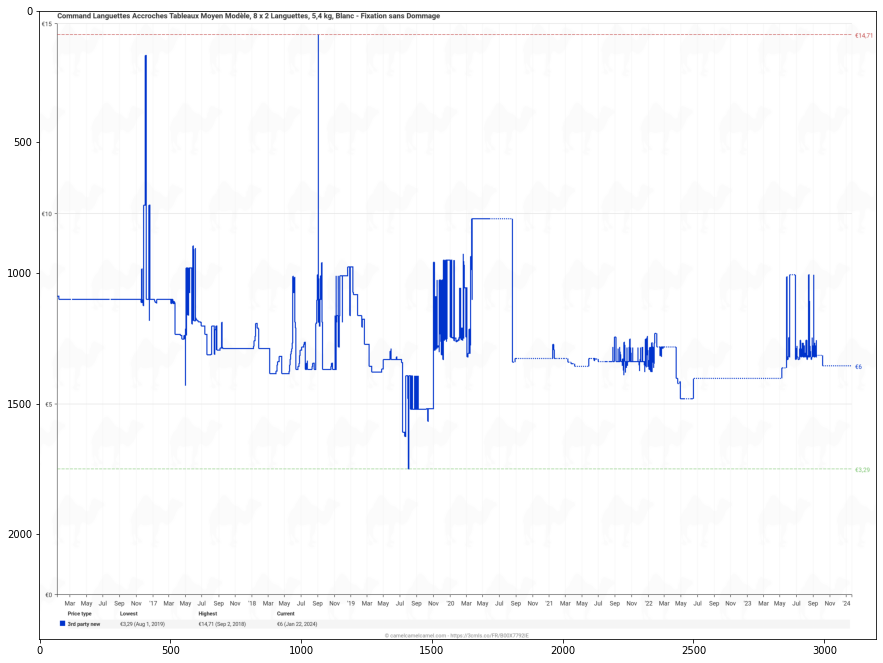

In [43]:
plt.figure(figsize=(15, 15))
plt.imshow(img_array);

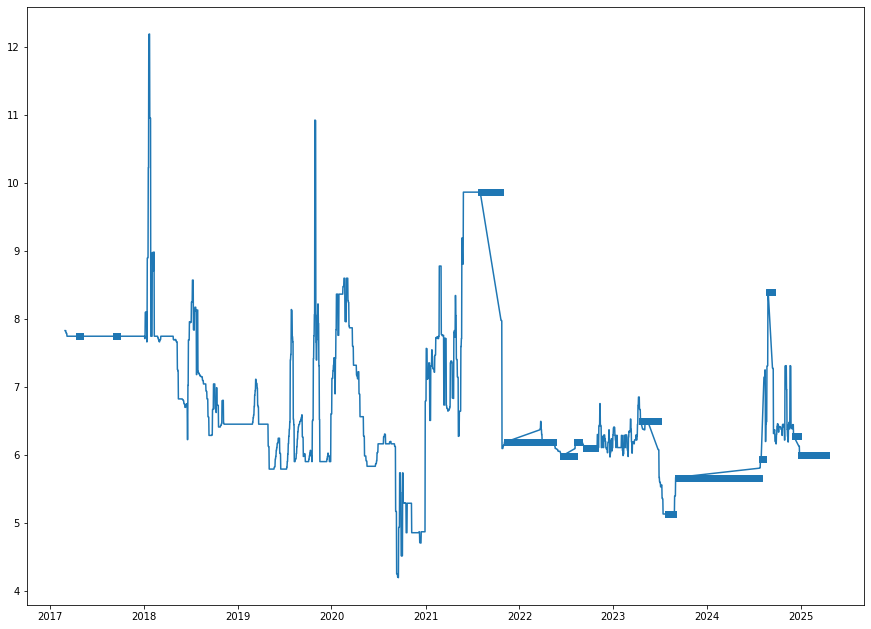

In [24]:
new_trusted = new_extract[new_extract['trusted']].copy()
new_not_trusted = new_extract[~new_extract['trusted']].copy()


plt.plot(new_trusted['date'], new_trusted['price'])
plt.scatter(new_not_trusted['date'], new_not_trusted['price'], marker='s')

plt.show()

In [16]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(collector.product_page_source, "html.parser")

In [19]:
price_history_summary = pd.read_html(
    str(soup.find_all(class_='table-scroll camelegend')[0].find('table'))
)[0]
collector.price_history_summary = price_history_summary.copy()

In [20]:
price_history_summary

,Type de prix,Le plus bas jamais atteint *,Le plus élevé de tous les temps *,Actuel +,Moyenne *
0,Amazon,"2,94€ (18 juin 2019)","11,07€ (10 fév. 2022)","6,90€ (31 déc. 2023)","6,29€"
1,Nouveauté 3ème partie,"3,29€ (31 juil. 2019)","14,71€ (02 sept. 2018)",-,"6,34€"
2,3eme occasion,"2,79€ (11 fév. 2020)","6,83€ (31 déc. 2023)",-,"4,83€"


In [11]:
min_price = 3.29
max_price = 14.71

In [27]:
# Pixels that have the RGB code for the maximum price
y, x = np.where(np.all(img_array == [194, 68, 68, 255], axis=2))

# Average y-coordinate of the left-most pixels with this RGB code
avg_y_coord_max = img_array.shape[0] - y[np.where(x == min(x))].mean()

# Minimum x-coordinate of the pixels with this RGB code outside of the horizontal dashed line
outside_chart_x_coord = min(
    x[
        np.where(
            ~np.isin(y, y[np.where(x == min(x))])
        )
    ]
)

# Pixels that have the RGB code for the minimum price
y, x = np.where(np.all(img_array == [119, 195, 107, 255], axis=2))

# Average y-coordinate of the left-most pixels with this RGB code
avg_y_coord_min = img_array.shape[0] - y[np.where(x == min(x))].mean()

# Minimum x-coordinate of the pixels with this RGB code outside of the horizontal dashed line
outside_chart_x_coord_bis = min(
    x[
        np.where(
            ~np.isin(y, y[np.where(x == min(x))])
        )
    ]
)

if outside_chart_x_coord != outside_chart_x_coord_bis:
    raise Exception('Writings on RHS of the graph seem misaligned.')

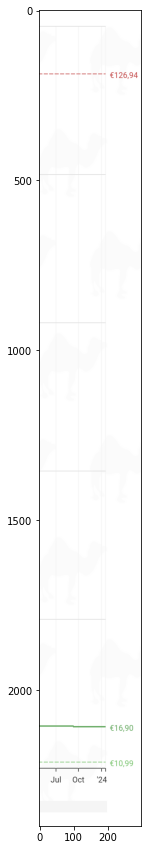

In [28]:
plt.figure(figsize=(12, 15))
plt.imshow(img_array[:, -300:, :]);

In [29]:
y, x = np.where(np.all(img_array == seller_colors[seller], axis=2))

In [40]:
x_axis_coords = []
avg_y_coords = []

max_y_axis_coords = []
min_y_axis_coords = []

for x_axis_coord in np.unique(x):
    if x_axis_coord < outside_chart_x_coord_bis:
        y_coords = y[np.where(x == x_axis_coord)]
        y_coords = y_coords[y_coords < 2400 - avg_y_coord_min].copy()
        
        if len(y_coords) == 0:
            continue

        avg_y_coord = img_array.shape[0] - y_coords.mean()
        
        max_y_axis_coord = img_array.shape[0] - y_coords.min()
        min_y_axis_coord = img_array.shape[0] - y_coords.max()
        
        max_y_axis_coords.append(max_y_axis_coord)
        min_y_axis_coords.append(min_y_axis_coord)
        avg_y_coords.append(avg_y_coord)
        x_axis_coords.append(x_axis_coord)

    else:
        continue
        
max_y_axis_coords = np.array(max_y_axis_coords)
min_y_axis_coords = np.array(min_y_axis_coords)
x_axis_coords = np.array(x_axis_coords)
avg_y_coords = np.array(avg_y_coords)

In [39]:
y_coords[y_coords < 2400 - avg_y_coord_min].copy()

array([], dtype=int64)

In [33]:
y_coords = y[np.where(x == x_axis_coord)]

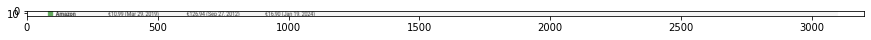

In [37]:
plt.figure(figsize=(15, 15))
plt.imshow(img_array[y_coords, :, :]);

In [86]:
price_history = pd.DataFrame(
    [x_axis_coords, avg_y_coords, max_y_axis_coords, min_y_axis_coords], 
    index=['x_axis_coord', 'avg_y_coords', 'max_y_axis_coord', 'min_y_axis_coord']
).T

In [87]:
# price_history['lead1_x_axis_coord'] = price_history['x_axis_coord'].shift(-1)
# price_history['lead4_x_axis_coord'] = price_history['x_axis_coord'].shift(-4)

In [88]:
# price_history['jump'] = (price_history['lead1_x_axis_coord'] != price_history['x_axis_coord'] + 1)
# price_history['continuous'] = (price_history['lead4_x_axis_coord'] == price_history['x_axis_coord'] + 4)

In [96]:
price_history['trusted'] = 1

for i in range(1, 5):
    price_history[f'lagged{i}_x_axis_coord'] = price_history['x_axis_coord'].shift(i)
    
    price_history[f'lagged{i}_x_axis_coord_match'] = (
        price_history[f'lagged{i}_x_axis_coord'] == price_history['x_axis_coord'] - i
    )
    
    price_history['trusted'] *= price_history[f'lagged{i}_x_axis_coord_match']

price_history['trusted'] = np.logical_or(
    price_history['trusted'], 
    price_history['lagged4_x_axis_coord'].isnull()
)

price_history['trusted'] = np.logical_or(
    price_history['trusted'], 
    price_history['max_y_axis_coord'] - price_history['min_y_axis_coord'] > 3
)

price_history = price_history.drop(
    columns=price_history.columns[
        price_history.columns.map(lambda col: col.startswith('lagged'))
    ]
)

price_history = price_history.drop(columns=['max_y_axis_coord', 'min_y_axis_coord'])

price_history['price'] = (
    min_price
    + (price_history['avg_y_coords'] - avg_y_coord_min)
    / (avg_y_coord_max - avg_y_coord_min)
    * (max_price - min_price)
)

In [97]:
price_history.head(20)

,x_axis_coord,avg_y_coords,trusted,price
0,70.0,1310.5,True,7.830482
1,71.0,1310.5,True,7.830482
2,72.0,1310.5,True,7.830482
3,73.0,1310.5,True,7.830482
4,74.0,1305.5,True,7.796084
5,75.0,1305.5,True,7.796084
6,76.0,1304.5,True,7.789205
7,77.0,1304.5,True,7.789205
8,78.0,1298.5,True,7.747928
9,79.0,1298.5,True,7.747928


In [91]:
price_history.iloc[45:60]

,x_axis_coord,avg_y_coords,max_y_axis_coord,min_y_axis_coord,trusted
45,115.0,1298.5,1300.0,1297.0,True
46,116.0,1298.5,1300.0,1297.0,True
47,117.0,1298.5,1300.0,1297.0,True
48,118.0,1298.5,1300.0,1297.0,True
49,119.0,1298.5,1300.0,1297.0,True
50,120.0,1298.5,1300.0,1297.0,True
51,121.0,1298.5,1300.0,1297.0,True
52,126.0,1298.5,1300.0,1297.0,False
53,127.0,1298.5,1300.0,1297.0,False
54,128.0,1298.5,1300.0,1297.0,False


In [95]:
price_history.iloc[1670:1720]

,x_axis_coord,avg_y_coords,max_y_axis_coord,min_y_axis_coord,trusted
1670,1772.0,1606.5,1608.0,1605.0,False
1671,1773.0,1606.5,1608.0,1605.0,False
1672,1778.0,1606.5,1608.0,1605.0,False
1673,1779.0,1606.5,1608.0,1605.0,False
1674,1780.0,1606.5,1608.0,1605.0,False
1675,1781.0,1606.5,1608.0,1605.0,False
1676,1786.0,1606.5,1608.0,1605.0,False
1677,1787.0,1606.5,1608.0,1605.0,False
1678,1788.0,1606.5,1608.0,1605.0,False
1679,1789.0,1606.5,1608.0,1605.0,False


In [ ]:
trusted = []

for i, row in price_history.iterrows():
    if i == 0:
        trusted.append(True)
        
    else:
        trusted_1 = trusted[-1]
        
        if trusted_1:
        
            if not row['jump']:
                trusted.append(True)
            
            else:
                trusted.append(True)
            
        else:
            
            if row['continuous']:
                trusted.append(True)
            
            else:
                trusted.append(True)
    
    if row['jump']:

In [ ]:
price_history['continuous']

In [18]:
price_history['lagged_max_y_axis_coord'] = price_history['max_y_axis_coord'].shift(1)
price_history['lagged_min_y_axis_coord'] = price_history['min_y_axis_coord'].shift(1)

In [19]:
price_history.head(10)

,x_axis_coord,avg_y_coords,max_y_axis_coord,min_y_axis_coord,lagged_max_y_axis_coord,lagged_min_y_axis_coord
0,70.0,1310.5,1312.0,1309.0,NaN,NaN
1,71.0,1310.5,1312.0,1309.0,1312.0,1309.0
2,72.0,1310.5,1312.0,1309.0,1312.0,1309.0
3,73.0,1310.5,1312.0,1309.0,1312.0,1309.0
4,74.0,1305.5,1312.0,1299.0,1312.0,1309.0
5,75.0,1305.5,1312.0,1299.0,1312.0,1299.0
6,76.0,1304.5,1312.0,1297.0,1312.0,1299.0
7,77.0,1304.5,1312.0,1297.0,1312.0,1297.0
8,78.0,1298.5,1300.0,1297.0,1312.0,1297.0
9,79.0,1298.5,1300.0,1297.0,1300.0,1297.0


In [20]:
price_history['price_decrease'] = price_history['min_y_axis_coord'] < price_history['lagged_min_y_axis_coord']

In [32]:
price_history.iloc[50:100]

,x_axis_coord,avg_y_coords,max_y_axis_coord,min_y_axis_coord,lagged_max_y_axis_coord,lagged_min_y_axis_coord,price_decrease
50,120.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
51,121.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
52,126.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
53,127.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
54,128.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
55,129.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
56,130.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
57,131.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
58,132.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
59,133.0,1298.5,1300.0,1297.0,1300.0,1297.0,False


In [29]:
price_history.iloc[300:400].head(50)

,x_axis_coord,avg_y_coords,max_y_axis_coord,min_y_axis_coord,lagged_max_y_axis_coord,lagged_min_y_axis_coord,price_decrease
300,378.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
301,379.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
302,380.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
303,381.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
304,382.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
305,383.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
306,384.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
307,385.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
308,386.0,1298.5,1300.0,1297.0,1300.0,1297.0,False
309,387.0,1298.5,1300.0,1297.0,1300.0,1297.0,False


In [79]:
prices = (
    min_price
    + (avg_y_coords - avg_y_coord_min)
    / (avg_y_coord_max - avg_y_coord_min)
    * (max_price - min_price)
)

price_history = pd.DataFrame(
    [x_axis_coords, avg_y_coords, prices], 
    index=['x_axis_coord', 'avg_y_coords', 'price']
).T

In [35]:
price_history['lead_x_axis_coord'] = price_history['x_axis_coord'].shift(-1)

In [ ]:
price_history['jump'] = (price_history['lead_x_axis_coord'] != price_history['x_axis_coord'] + 1)

In [81]:
price_history['continuous'] = (price_history['lead_x_axis_coord'] == price_history['x_axis_coord'] + 1)

In [83]:
for i in range(1, 6):
    print(i)

1
2
3
4


In [82]:
for i, row in price_history.iterrows():

,x_axis_coord,avg_y_coords,price,lead_x_axis_coord,jump,continuous
0,70.0,1310.5,7.830482,71.0,False,True
1,71.0,1310.5,7.830482,72.0,False,True
2,72.0,1310.5,7.830482,73.0,False,True
3,73.0,1310.5,7.830482,74.0,False,True
4,74.0,1305.5,7.796084,75.0,False,True
5,75.0,1305.5,7.796084,76.0,False,True
6,76.0,1304.5,7.789205,77.0,False,True
7,77.0,1304.5,7.789205,78.0,False,True
8,78.0,1298.5,7.747928,79.0,False,True
9,79.0,1298.5,7.747928,80.0,False,True


In [78]:
price_history[price_history['avg_y_coords'] == avg_y_coord_max]

,x_axis_coord,avg_y_coords,price


In [77]:
avg_y_coord_max

2310.5

In [54]:
price_history.head(10)

,x_axis_coord,price,lead_x_axis_coord
0,70.0,7.830482,71.0
1,71.0,7.830482,72.0
2,72.0,7.830482,73.0
3,73.0,7.830482,74.0
4,74.0,7.796084,75.0
5,75.0,7.796084,76.0
6,76.0,7.789205,77.0
7,77.0,7.789205,78.0
8,78.0,7.747928,79.0
9,79.0,7.747928,80.0


In [59]:
price_history['jump'] = (price_history['lead_x_axis_coord'] != price_history['x_axis_coord'] + 1)

In [60]:
price_history['gap'] = price_history['lead_x_axis_coord'] - price_history['x_axis_coord']

In [65]:
price_history[np.logical_and(price_history['gap'] > 1, price_history['gap'] < 5)]

,x_axis_coord,price,lead_x_axis_coord,gap,jump
1687,1805.0,9.866819,1808.0,3.0,True
1695,1815.0,6.096843,1818.0,3.0,True
1785,1975.0,6.193157,1978.0,3.0,True
1809,2017.0,6.193157,2020.0,3.0,True
1829,2043.0,6.055566,2046.0,3.0,True
1867,2107.0,6.193157,2110.0,3.0,True
1887,2133.0,6.179398,2136.0,3.0,True
2157,2445.0,5.532723,2448.0,3.0,True
2369,2835.0,5.670313,2838.0,3.0,True
2381,2853.0,5.945494,2856.0,3.0,True


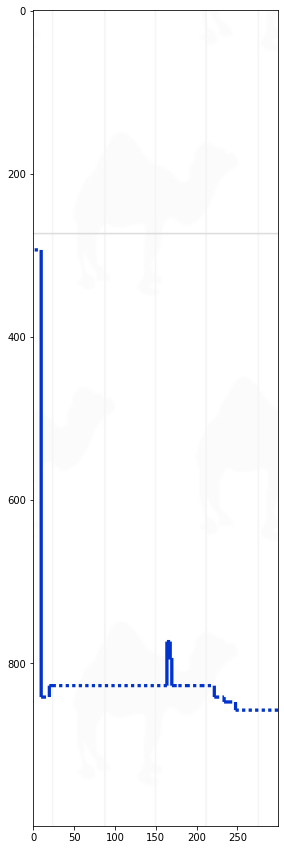

In [69]:
plt.figure(figsize=(15, 15))
plt.imshow(img_array[500:1500, 1800:2100, :]);